<a href="https://colab.research.google.com/github/BTOCC25/AIStudy-public/blob/main/%EA%B3%B5%EA%B8%B0%EC%95%95%EC%B6%95%EA%B8%B0_%EC%9D%B4%EC%83%81_%ED%8C%90%EB%8B%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
train_csv_path = '/content/drive/MyDrive/Project/ai_factory/공기압축기_이상_판단/data/train_data.csv'
test_csv_path = '/content/drive/MyDrive/Project/ai_factory/공기압축기_이상_판단/data/test_data.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

hp = [] #리스트 생성
for df in [train_df, test_df]:
  for row in df['type']:
      if row in [0, 4, 5, 6, 7]:
          hp.append(30)
      elif row == 1:
          hp.append(20)
      elif row == 2:
          hp.append(10)
      elif row == 3:
          hp.append(50)   
  df['hp'] = hp
  hp = []

train_df.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,hp
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,30
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,30
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,30
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,30
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,30


## EDA

In [29]:
train_df.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,hp
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369,28.014616
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386,2.230113,10.964670
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000,10.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000,20.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000,30.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000,30.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000,50.000000


In [30]:
test_df.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,hp
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000
mean,2.103129,49.042735,0.699840,27.417935,2373.820003,65.771623,3.345523,2.957369,28.014616
std,1.163998,8.686208,0.005377,13.234089,687.737182,7.741473,0.644199,2.229811,10.963186
min,0.340000,32.080000,0.490000,5.370000,1200.000000,50.420000,1.970000,0.000000,10.000000
25%,1.280000,41.510000,0.700000,17.200000,1774.000000,59.110000,2.890000,1.000000,20.000000
50%,1.940000,48.760000,0.700000,26.170000,2355.000000,65.520000,3.260000,3.000000,30.000000
75%,2.770000,56.580000,0.700000,35.860000,2972.000000,72.440000,3.730000,5.000000,30.000000
max,6.240000,65.540000,0.700000,74.000000,3564.000000,82.390000,6.260000,7.000000,50.000000


train data(모두 정상)를 보면 out_pressure의 값이 모두 7임을 알 수 있음. 그런데 test data(이상치 포함)에는 7이 아닌 값이 몇개 있다.

-> 7이 아닌값에 대해서 anormaly value인지 확인 실험

**마력별 데이터 개수**

In [48]:
train_df['hp'].value_counts()

30    1422
20     369
10     366
50     306
Name: hp, dtype: int64

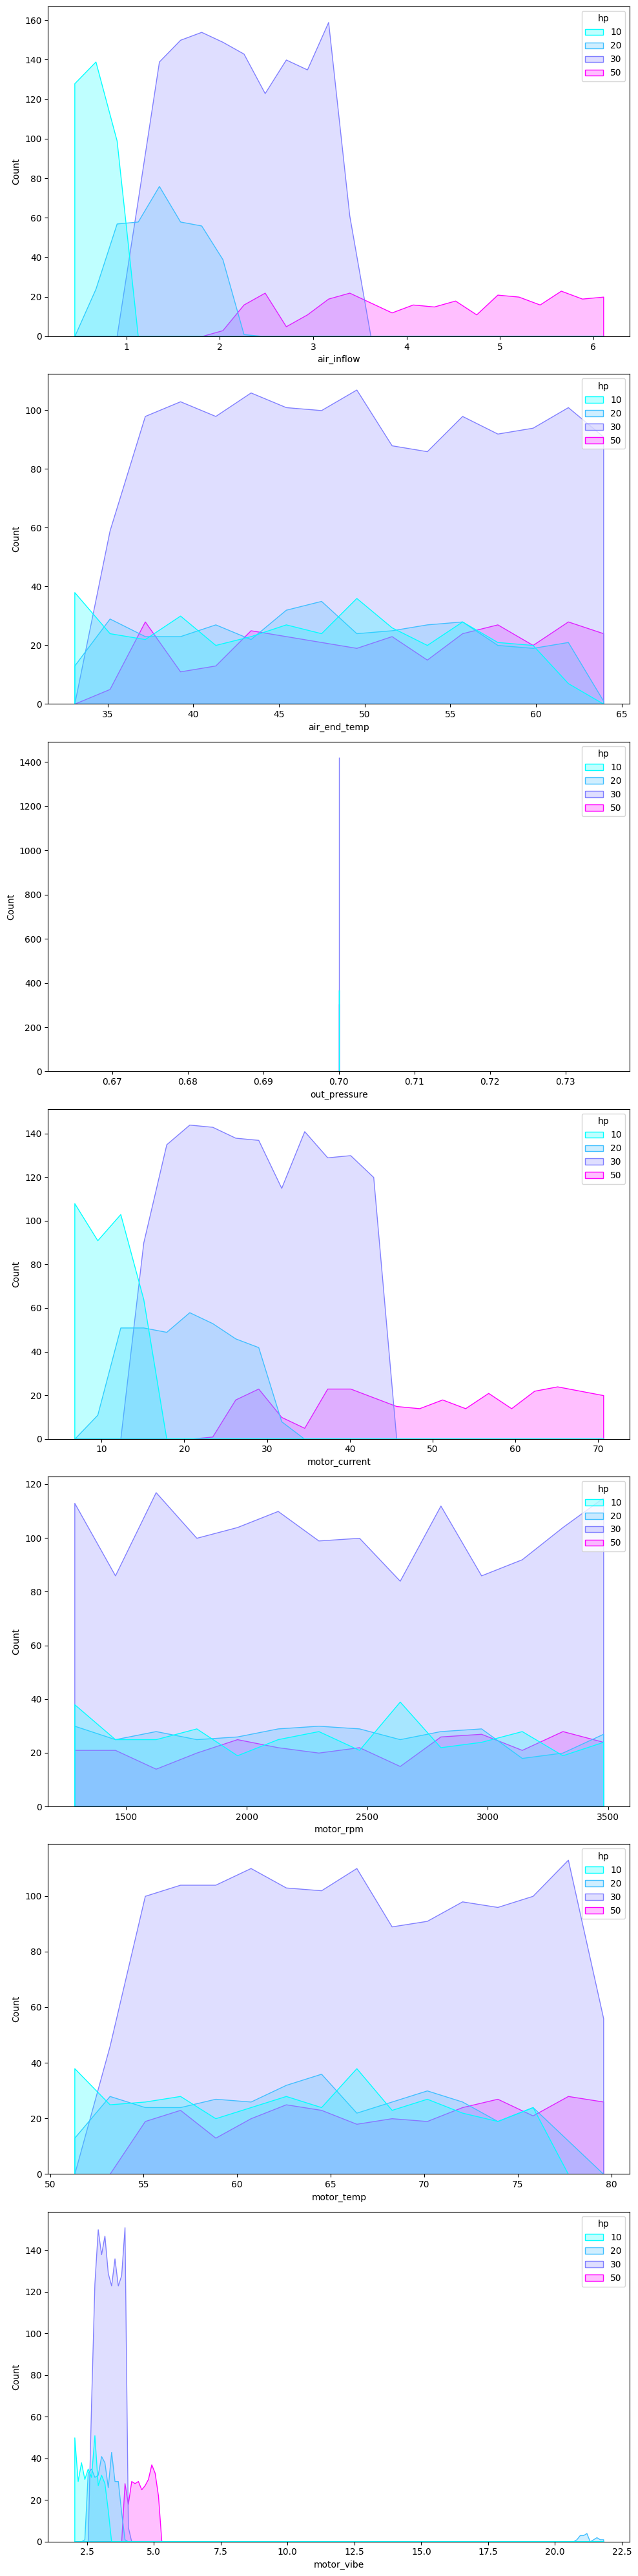

In [75]:
fig, ax = plt.subplots(7, 1)
fig.set_size_inches(10, 40)
features = list(train_df.columns)[:-2]

for i in range(len(features)):
  cur_ax = ax[i]
  sns.histplot(data=train_df, x=features[i],
                hue='hp',
                hue_order=[10, 20, 30, 50],
                palette='cool',
                ax=cur_ax,
                element='poly'
               )
  
plt.tight_layout()

In [45]:
plt.hist([])

<module 'pyarrow' from '/usr/local/lib/python3.9/dist-packages/pyarrow/__init__.py'>